## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
from TCGame_Env1 import TicTacToe
import pandas as pd

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [5]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [6]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [7]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-x-x-x-x-x-x-x-x',(7,5)),('x-x-x-x-x-x-x-x-x',(2,9))]    #select some 4 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [8]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [9]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [10]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [11]:
#Defining parameters for the training

EPISODES = 3000000
LR = 0.01                   # learning rate
GAMMA = 0.9                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001        # epsilon decay rate
threshold = 200       # no of episodes after which states_tracked wwill be saved
print_threshold = 50000   # no of episodes after which Q dictionary/table will be saved

### Q-update loop ---write your code here

In [12]:
start_time = time.time()
agent = 0
tie = 0
environment = 0
game_stats=[]
for episode in range(EPISODES):
    env = TicTacToe()  # call the environment
    curr_state = env.state
    isTerminal = False
    add_to_dict(curr_state)  # adding the current state to dictionary
    
  
    while not isTerminal:
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)  # applying epislon method
        reward, next_state, isTerminal = env.step(curr_state, curr_action)  # getting rewar
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)
        
        # Updating rules
        if not isTerminal:
            max_next = max(Q_dict[next_state_temp], key=Q_dict[next_state_temp].get)
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA * (Q_dict[next_state_temp][max_next])))
                                                          - Q_dict[curr_state1][curr_action])
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))
            if reward == 10:
                agent+=1
            elif reward == -10:
                environment+=1
            else:
                tie+=1
                
            
        # navigating to next state
        curr_state = next_state

    # states tracking   
    if ((episode + 1) % threshold) == 0:
        save_tracking_states()
        #save_obj(States_track, 'States_tracking')
        
    # states tracking   
    if (episode % 5000) == 0:
        save_tracking_states()
        game_stats.append({'agent' : agent, 'tie' : tie , 'environment' : environment})
        agent = 0
        tie = 0
        environment = 0

    
    #save_obj(Q_dict, 'Policy_Q_dict')
    if ((episode + 1) % print_threshold) == 0:  
        
        print("Episode {} is completed".format(episode))

elapsed_time = time.time() - start_time
save_obj(States_track, 'States_tracking')
save_obj(Q_dict, 'Policy_Q_dict')
print("Time", elapsed_time)

Episode 49999 is completed
Episode 99999 is completed
Episode 149999 is completed
Episode 199999 is completed
Episode 249999 is completed
Episode 299999 is completed
Episode 349999 is completed
Episode 399999 is completed
Episode 449999 is completed
Episode 499999 is completed
Episode 549999 is completed
Episode 599999 is completed
Episode 649999 is completed
Episode 699999 is completed
Episode 749999 is completed
Episode 799999 is completed
Episode 849999 is completed
Episode 899999 is completed
Episode 949999 is completed
Episode 999999 is completed
Episode 1049999 is completed
Episode 1099999 is completed
Episode 1149999 is completed
Episode 1199999 is completed
Episode 1249999 is completed
Episode 1299999 is completed
Episode 1349999 is completed
Episode 1399999 is completed
Episode 1449999 is completed
Episode 1499999 is completed
Episode 1549999 is completed
Episode 1599999 is completed
Episode 1649999 is completed
Episode 1699999 is completed
Episode 1749999 is completed
Episode

In [13]:
stats = pd.DataFrame(game_stats)

In [14]:
stats.describe()

,agent,tie,environment
count,600.000000,600.000000,600.00000
mean,3662.745000,830.748333,498.17500
std,1378.328274,870.869304,500.88983
min,0.000000,0.000000,1.00000
25%,1961.750000,162.000000,115.00000
50%,4678.000000,198.000000,134.00000
75%,4722.000000,1915.250000,1128.50000
max,4772.000000,2399.000000,1416.00000


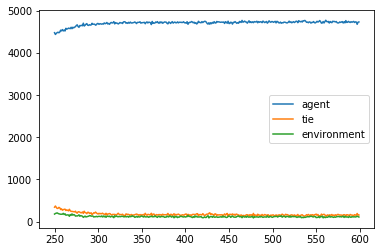

In [25]:
stats.tail(350).plot()

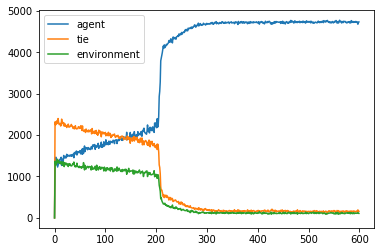

In [16]:
stats.plot()

##### Agent has learned to play tic tac toe

#### Check the Q-dictionary

In [17]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.2434528839557806,
              (0, 3): -1.2402947749478863,
              (0, 5): -1.2403437911967807,
              (0, 7): -1.2438193817629357,
              (0, 9): -1.2403561526761546,
              (1, 1): -1.2407002822547868,
              (1, 3): -1.242153767599506,
              (1, 5): -1.2387133683101896,
              (1, 7): -1.240483790824053,
              (1, 9): -1.2401791954880368,
              (2, 1): -1.2405344270036387,
              (2, 3): -1.2417289078494422,
              (2, 5): -1.2389006789372952,
              (2, 7): -1.2409337994509946,
              (2, 9): -1.23893852030789,
              (3, 1): -1.2423626851099319,
              (3, 3): -1.2420529346990221,
              (3, 5): -1.2390185852130482,
              (3, 7): -1.239384228372646,
              (3, 9): -1.2394433952454946,
              (4, 1): -1.243819961782517,
              (4, 3): -1.243505963936584,
              (4, 5): 

In [18]:
len(Q_dict)

1387742

In [19]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
max_val = max(Q_dict['x-x-x-x-x-x-x-x-x'].values())

for action, value in Q_dict['x-x-x-x-x-x-x-x-x'].items():
    if value == max_val:
        print(action)
        print(value)

(6, 9)
5.1187185701058375


#### Check the states tracked for Q-values convergence
(non-evaluative)

<function matplotlib.pyplot.show(*args, **kw)>

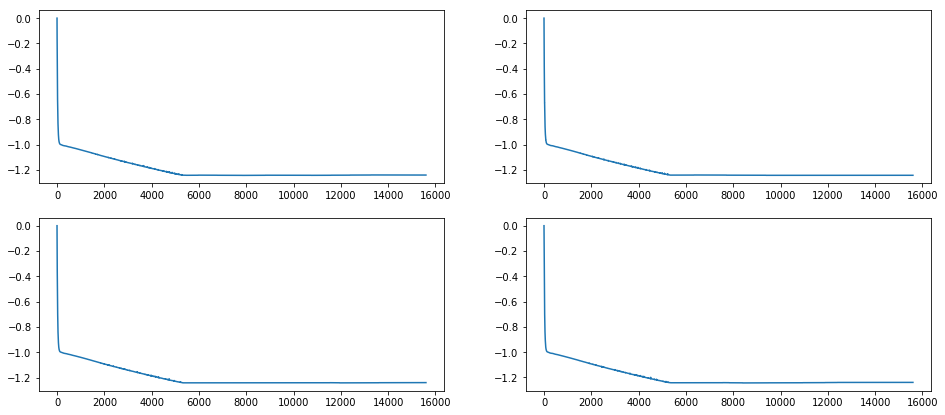

In [26]:
# Write the code for plotting the graphs for state-action pairs tracked
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(7,5)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(7,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(2,9)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(2,9)]))
plt.show